# 载入数据

In [46]:
import pandas as pd
df = pd.read_excel('./job_detail.xlsx')
# 将载入的数据修改为列表
df['职位详情'] = [eval(df['职位详情'][i]) for i in range(len(df['职位详情']))]
df = df.drop(['Unnamed: 0'], axis=1)

In [47]:
display(df)

,职位名称,职位详情,学历要求,工作经验要求,薪资待遇,工作城市,招聘公司,公司类型,公司行业,发布时间,数据所在模块,工作所在省份
0,高级软件工程师,"[c++, java, 主流数据库设计和开发, mes, wms, 低代码平台设计, jav...",本科,5,20833-25000,宁波,宁波伟立机器人科技股份有限公司,民营,"['仪器仪表/工业自动化', '机械/设备/重工']",02-18,高级软件工程师,浙江省
1,高级软件工程师,"[电子线路设计, 汇编语言, arm单片机]",本科,1,10000-18000,深圳-宝安区,新丰电器（深圳）有限公司,外资（非欧美）,['家具/家电/玩具/礼品'],02-18,高级软件工程师,广东省
2,Java高级开发工程师,"[java, springmvc, springboot, mybatis, restful...",本科,5,15000-20000·15薪,成都-天府新区,商飞软件有限公司,国企,"['航天/航空', '计算机软件']",02-18,高级软件工程师,四川省
3,运动控制算法工程师,"[差速驱动轮式, 汽车底盘轮式, 动力学建模, 控制系统建模, 算法仿真, 基础运动控制, ...",本科,3,15000-30000,深圳-龙华区,深圳博鹏智能科技有限公司,民营,"['电子技术/半导体/集成电路', '机械/设备/重工']",02-18,高级软件工程师,广东省
4,交换机软件专家,"[交换机, 交换机产品, 架构设计, 组网方案设计, 关键技术, 硬件适配, 芯片问题, 排...",本科,3,30000-60000,深圳-南山区,广州市吉灏电子有限公司,民营,"['计算机软件', '电子技术/半导体/集成电路']",02-18,高级软件工程师,广东省
...,...,...,...,...,...,...,...,...,...,...,...,...
27623,软件工程师,"[c++, 三维互动仿真, 数学等资历, 无加班, 带薪年假, 地铁16号线, 班车接送, ...",本科,2,8000-10000,上海-浦东新区,上海数林软件有限公司,民营,"['计算机软件', '教育/培训/院校']",03-11,软件工程师,上海市
27624,APP开发工程师（网络及流动应用程序),"[reactjs, reactnative, mysql, python, django, ...",本科,1,20000-30000,深圳-罗湖区,惠记环保工程（上海）有限公司,外资（非欧美）,['建筑/建材/工程'],03-11,软件工程师,广东省
27625,IT Engineer 软件工程师,[none],本科,1,6000-9000,苏州,太极半导体（苏州）有限公司,国企,['电子技术/半导体/集成电路'],03-20,软件工程师,江苏省
27626,接入网关研发工程师/资深专家-深圳 (职位编号：7211361769145731388),[none],本科,0,40000-80000,深圳,字节跳动,民营,"['互联网/电子商务', '计算机软件']",03-20,软件工程师,广东省


In [48]:
# 清理与输入关键词相同的词汇
def clean_self(self, self_word):
    result = []
    for temp in self:
        middle = []
        if temp is not None:
            for word in temp:
                if self_word not in word:
                    middle.append(word)
        result.append(middle)
    return result

# 制作薪资与其他项目关系图

### 薪资与学历关系图

In [49]:
search_job = ''

In [50]:
# 将搜索到的Java（不区分大小写）传入待画图的数据中
this = df[df['职位名称'].str.contains(search_job, case= False)]

this = this.reset_index(drop = True)
print('数据总条数：{}'.format(len(this)))

数据总条数：27628


In [51]:
import re
# 遍历一列数据后取出能够分割为两条数据以上的数据，其他不能参与分析数据不传入分析
this = this[pd.DataFrame([len(re.findall('[\d|\.]+', temp)) >= 2 for temp in this['薪资待遇']])[0]]
# print(type(df['薪资待遇']!='None'))
# print(this)

this = this.reset_index(drop = True)
# print(len(this))
# this['薪资待遇']

In [52]:
import re
# 最低薪资
# min = re.findall('[\d|\.]+', this['薪资待遇'][i])[0]
# 最高薪资
# max = re.findall('[\d|\.]+', this['薪资待遇'][i])[1]
this = pd.concat([this, pd.DataFrame(columns=['最低薪资'])], sort=False)
this = pd.concat([this, pd.DataFrame(columns=['最高薪资'])], sort=False)
for i in range(len(this)):
    this.loc[i, '最低薪资'] = int(re.findall('[\d|\.]+', this['薪资待遇'][i])[0])
for i in range(len(this)):
    this.loc[i, '最高薪资'] = int(re.findall('[\d|\.]+', this['薪资待遇'][i])[1])
# print(this['最低薪资'])
# print(this['最高薪资'])
display(this)

,职位名称,职位详情,学历要求,工作经验要求,薪资待遇,工作城市,招聘公司,公司类型,公司行业,发布时间,数据所在模块,工作所在省份,最低薪资,最高薪资
0,高级软件工程师,"[c++, java, 主流数据库设计和开发, mes, wms, 低代码平台设计, jav...",本科,5.0,20833-25000,宁波,宁波伟立机器人科技股份有限公司,民营,"['仪器仪表/工业自动化', '机械/设备/重工']",02-18,高级软件工程师,浙江省,20833,25000
1,高级软件工程师,"[电子线路设计, 汇编语言, arm单片机]",本科,1.0,10000-18000,深圳-宝安区,新丰电器（深圳）有限公司,外资（非欧美）,['家具/家电/玩具/礼品'],02-18,高级软件工程师,广东省,10000,18000
2,Java高级开发工程师,"[java, springmvc, springboot, mybatis, restful...",本科,5.0,15000-20000·15薪,成都-天府新区,商飞软件有限公司,国企,"['航天/航空', '计算机软件']",02-18,高级软件工程师,四川省,15000,20000
3,运动控制算法工程师,"[差速驱动轮式, 汽车底盘轮式, 动力学建模, 控制系统建模, 算法仿真, 基础运动控制, ...",本科,3.0,15000-30000,深圳-龙华区,深圳博鹏智能科技有限公司,民营,"['电子技术/半导体/集成电路', '机械/设备/重工']",02-18,高级软件工程师,广东省,15000,30000
4,交换机软件专家,"[交换机, 交换机产品, 架构设计, 组网方案设计, 关键技术, 硬件适配, 芯片问题, 排...",本科,3.0,30000-60000,深圳-南山区,广州市吉灏电子有限公司,民营,"['计算机软件', '电子技术/半导体/集成电路']",02-18,高级软件工程师,广东省,30000,60000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27351,软件工程师,"[c++, 三维互动仿真, 数学等资历, 无加班, 带薪年假, 地铁16号线, 班车接送, ...",本科,2.0,8000-10000,上海-浦东新区,上海数林软件有限公司,民营,"['计算机软件', '教育/培训/院校']",03-11,软件工程师,上海市,8000,10000
27352,APP开发工程师（网络及流动应用程序),"[reactjs, reactnative, mysql, python, django, ...",本科,1.0,20000-30000,深圳-罗湖区,惠记环保工程（上海）有限公司,外资（非欧美）,['建筑/建材/工程'],03-11,软件工程师,广东省,20000,30000
27353,IT Engineer 软件工程师,[none],本科,1.0,6000-9000,苏州,太极半导体（苏州）有限公司,国企,['电子技术/半导体/集成电路'],03-20,软件工程师,江苏省,6000,9000
27354,接入网关研发工程师/资深专家-深圳 (职位编号：7211361769145731388),[none],本科,0.0,40000-80000,深圳,字节跳动,民营,"['互联网/电子商务', '计算机软件']",03-20,软件工程师,广东省,40000,80000


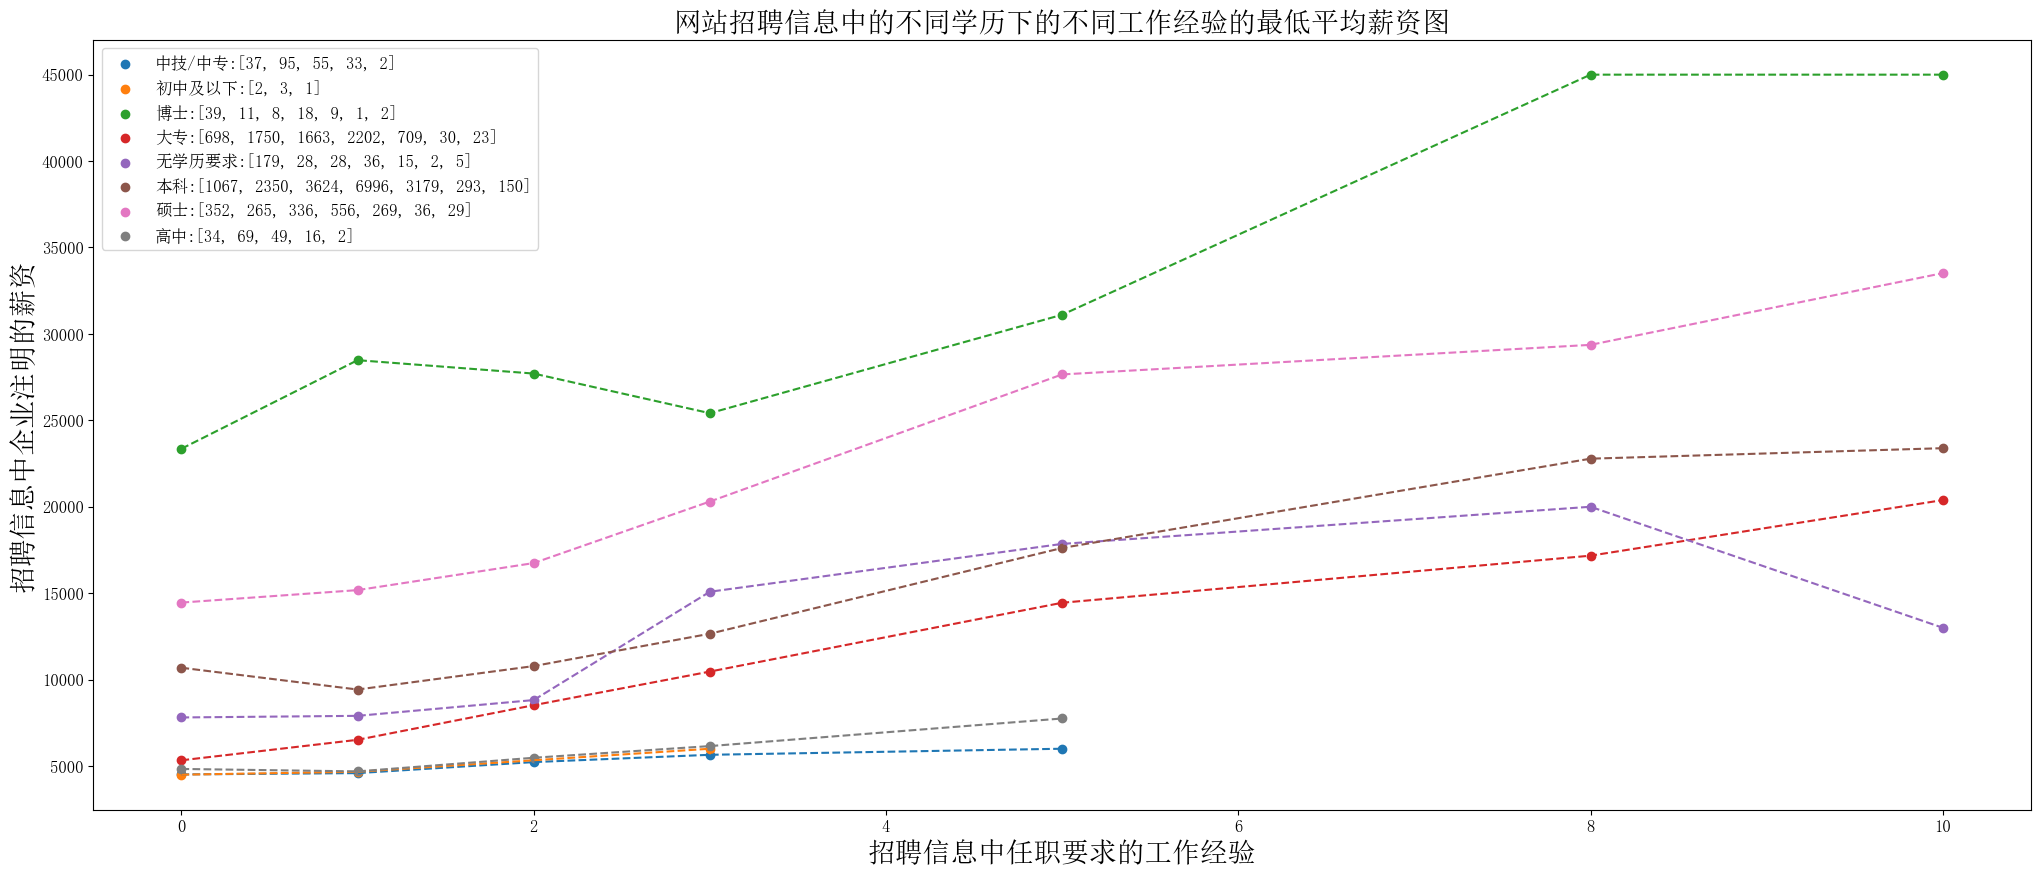

In [53]:
import matplotlib.pyplot as plt


# 按照学历要求分组
groups = this.groupby('学历要求')
# x轴数据列表
x_list = []
y_list = []
label_list = [[], []]
# y轴数据列表
'''生成坐标轴数据'''
for group_name,group in groups:
    years_groups = pd.DataFrame(group).groupby('工作经验要求')
    X = []
    Y = []
    label_num = []
    label_list[0].append(group_name) # group_name为图例
    for years_group_name,year_group in years_groups:
        # 保留每一个点数据的数据总数以供参考该点数据的价值
        label_num.append(len(year_group['最低薪资']))
        # 计算并设置变量存放本分组内的薪资平均值
        loc = 0
        for temp in range(len(year_group['最低薪资'])):
            year_group = year_group.reset_index(drop = True)
            
            loc = int(((loc * temp) + year_group['最低薪资'][temp])/(temp+1))

        # 剔除其中数据不超过20条的分组
#         if len(year_group['最低薪资']) > 10:
        X.append(int(years_group_name))# X轴数据
        Y.append(loc)# Y轴数据
    x_list.append(X)
    y_list.append(Y)
    label_list[1].append(label_num)
# 设置字体
config = {
    "font.family": "serif",  # 使用衬线体
    "font.serif": ["SimSun"],  # 全局默认使用衬线宋体
    "font.size": 12,  # 五号，10.5磅
    "axes.unicode_minus": False,
    "mathtext.fontset": "stix",  # 设置 LaTeX 字体，stix 近似于 Times 字体
}
plt.rcParams.update(config)
# 设置画布颜色
# plt.gcf().set_facecolor('lightblue')
# Create a figure object
fig = plt.figure(figsize=(25,10))
# Add a subplot to the figure
ax = fig.add_subplot()
ax.patch.set_facecolor('white')
# 生成散点图并添加图例
for temp in range(len(x_list)):
    plt.scatter(x_list[temp], y_list[temp], label='{}:{}'.format(label_list[0][temp], label_list[1][temp]))
    plt.plot(x_list[temp], y_list[temp], '--')
plt.legend(facecolor='white')
# 添加折线


# 添加图表标题和坐标轴标签
plt.title('网站招聘信息中的不同学历下的不同工作经验的最低平均薪资图', fontsize=20)
plt.xlabel('招聘信息中任职要求的工作经验', fontsize=20)
plt.ylabel('招聘信息中企业注明的薪资', fontsize=20)
plt.show()

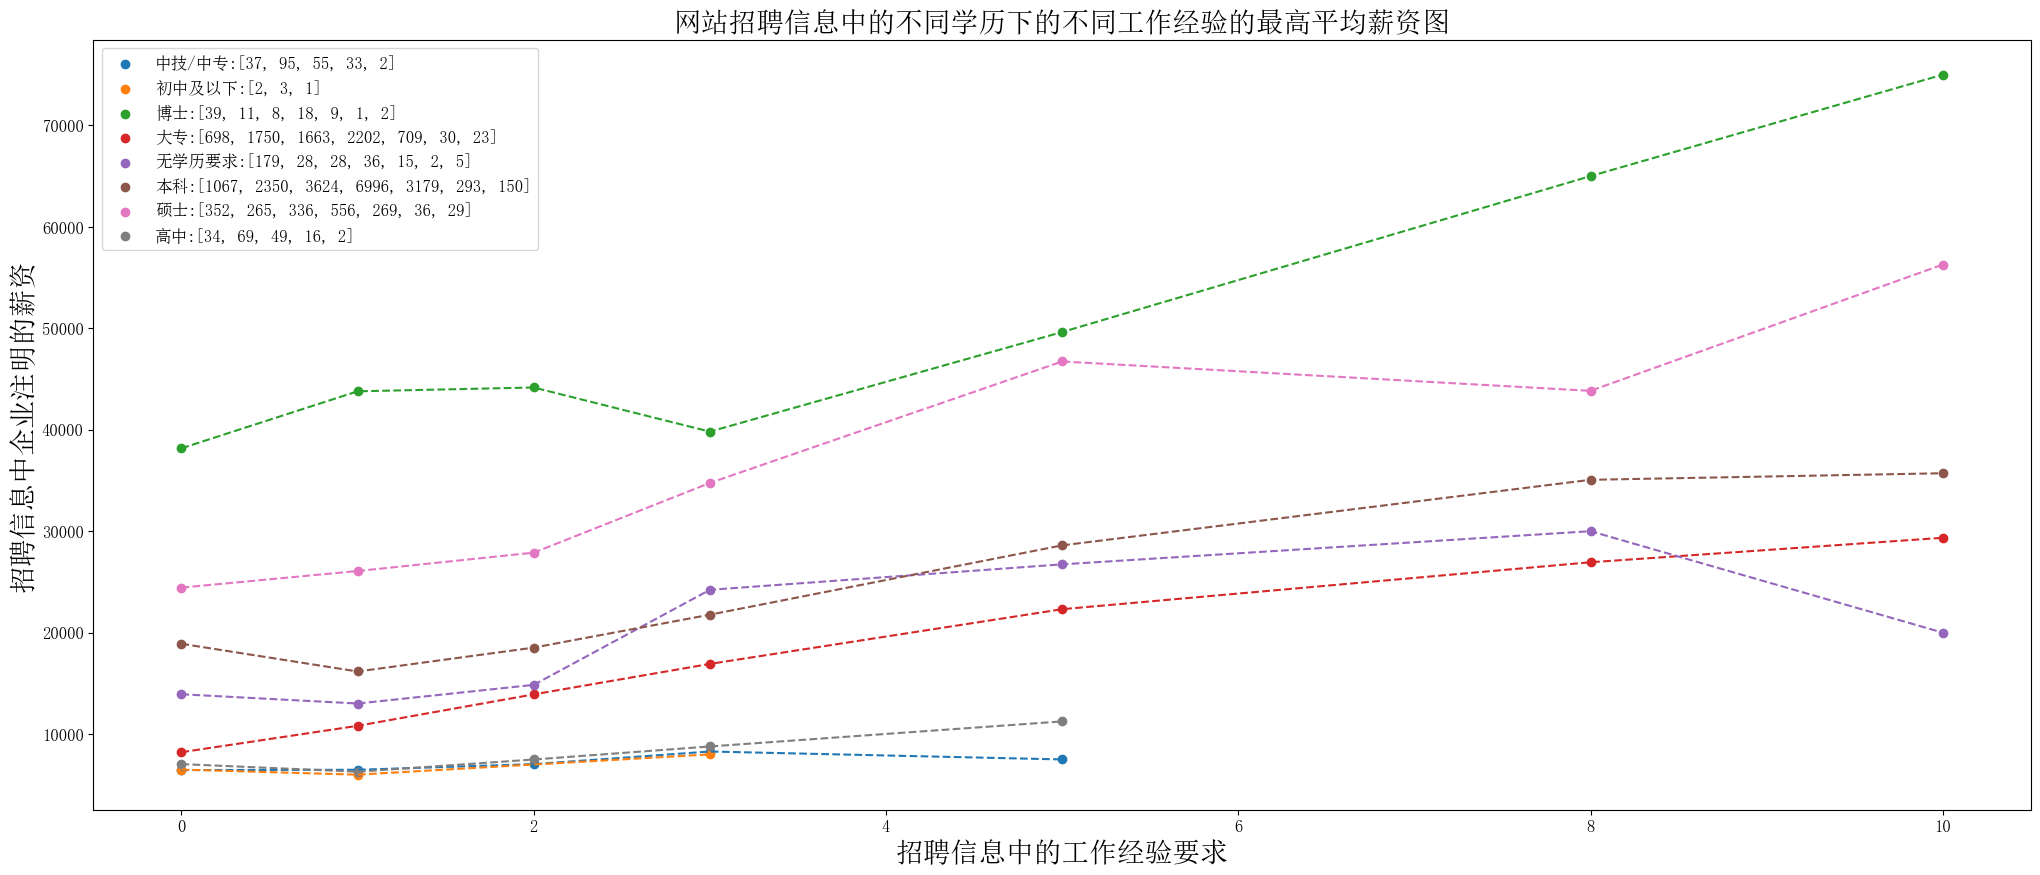

In [54]:
import matplotlib.pyplot as plt


# 按照学历要求分组
groups = this.groupby('学历要求')
# x轴数据列表
x_list = []
y_list = []
label_list = [[], []]
# y轴数据列表
'''生成坐标轴数据'''
for group_name,group in groups:
    years_groups = pd.DataFrame(group).groupby('工作经验要求')
    X = []
    Y = []
    label_num = []
    label_list[0].append(group_name) # group_name为图例
    for years_group_name,year_group in years_groups:
        # 保留每一个点数据的数据总数以供参考该点数据的价值
        label_num.append(len(year_group['最高薪资']))
        # 计算并设置变量存放本分组内的薪资平均值
        loc = 0
        for temp in range(len(year_group['最高薪资'])):
            year_group = year_group.reset_index(drop = True)
#             print(temp)
#             print(year_group)
            loc = int(((loc * temp) + year_group['最高薪资'][temp])/(temp+1))
        # 剔除其中数据不超过20条的分组
#         if len(year_group['最高薪资']) > 10:
        X.append(int(years_group_name))# X轴数据
        Y.append(loc)# Y轴数据
    x_list.append(X)
    y_list.append(Y)
    label_list[1].append(label_num)
# 设置字体
config = {
    "font.family": "serif",  # 使用衬线体
    "font.serif": ["SimSun"],  # 全局默认使用衬线宋体
    "font.size": 12,  # 五号，10.5磅
    "axes.unicode_minus": False,
    "mathtext.fontset": "stix",  # 设置 LaTeX 字体，stix 近似于 Times 字体
}
plt.rcParams.update(config)
# 设置画布颜色
# plt.gcf().set_facecolor('lightblue')
# Create a figure object
fig = plt.figure(figsize=(25,10))
# Add a subplot to the figure
ax = fig.add_subplot()
ax.patch.set_facecolor('white')
# 生成散点图并添加图例
for temp in range(len(x_list)):
    plt.scatter(x_list[temp], y_list[temp], label='{}:{}'.format(label_list[0][temp], label_list[1][temp]))
    plt.plot(x_list[temp], y_list[temp], '--')
plt.legend(facecolor='white')
# 添加折线


# 添加图表标题和坐标轴标签
plt.title('网站招聘信息中的不同学历下的不同工作经验的最高平均薪资图', fontsize=20)
plt.xlabel('招聘信息中的工作经验要求', fontsize=20)
plt.ylabel('招聘信息中企业注明的薪资', fontsize=20)
plt.show()

### 薪资与城市关系图

In [55]:
search_job = 'java'

In [56]:
def get_regions(province):
    regions = {
    '南方地区': ['浙江省', '上海市', '广东省', '广西壮族自治区', '海南省', '福建省', '江西省', '湖南省', '贵州省', '云南省', '四川省', '西藏自治区', '台湾省', '香港特别行政区', '澳门特别行政区'],
    '北方地区': ['北京市', '天津市', '河北省', '山西省', '内蒙古自治区', '辽宁省', '吉林省', '黑龙江省', '陕西省', '甘肃省', '青海省', '宁夏回族自治区', '新疆维吾尔自治区'],
    '中部地区': ['河南省', '湖北省', '山东省', '江苏省', '安徽省', '湖南省', '江西省']
}
    if province in regions['南方地区']:
        return '南方地区'
    elif province in regions['北方地区']:
        return '北方地区'
    elif province in regions['中部地区']:
        return '中部地区'
    else:
        return None

In [57]:
# 将搜索到的Java（不区分大小写）传入待画图的数据中
this = df[df['职位名称'].str.contains(search_job, case= False)]

this = this.reset_index(drop = True)
print('数据总条数：{}'.format(len(this)))

数据总条数：2528


In [58]:
# 获取待分析数据的省份所在地区
this = pd.concat([this, pd.DataFrame(columns=['省份所在地区'])], sort=False)
for i in range(len(this["工作所在省份"])):
    this["省份所在地区"][i] = get_regions(this["工作所在省份"][i])

C:\Users\Gimes\AppData\Local\Temp\ipykernel_10032\424122584.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  this["省份所在地区"][i] = get_regions(this["工作所在省份"][i])


In [59]:
import re
# 遍历一列数据后取出能够分割为两条数据以上的数据，其他不能参与分析数据不传入分析
this = this[pd.DataFrame([len(re.findall('[\d|\.]+', temp)) >= 2 for temp in this['薪资待遇']])[0]]
# print(type(df['薪资待遇']!='None'))
# print(this)

this = this.reset_index(drop = True)
# print(len(this))
# this['薪资待遇']

In [60]:
import re
# 最低薪资
# min = re.findall('[\d|\.]+', this['薪资待遇'][i])[0]
# 最高薪资
# max = re.findall('[\d|\.]+', this['薪资待遇'][i])[1]
this = pd.concat([this, pd.DataFrame(columns=['最低薪资'])], sort=False)
this = pd.concat([this, pd.DataFrame(columns=['最高薪资'])], sort=False)
for i in range(len(this)):
    this.loc[i, '最低薪资'] = int(re.findall('[\d|\.]+', this['薪资待遇'][i])[0])
for i in range(len(this)):
    this.loc[i, '最高薪资'] = int(re.findall('[\d|\.]+', this['薪资待遇'][i])[1])
# print(this['最低薪资'])
# print(this['最高薪资'])
# display(this)

# 工作省份所在地区与最低薪资关系

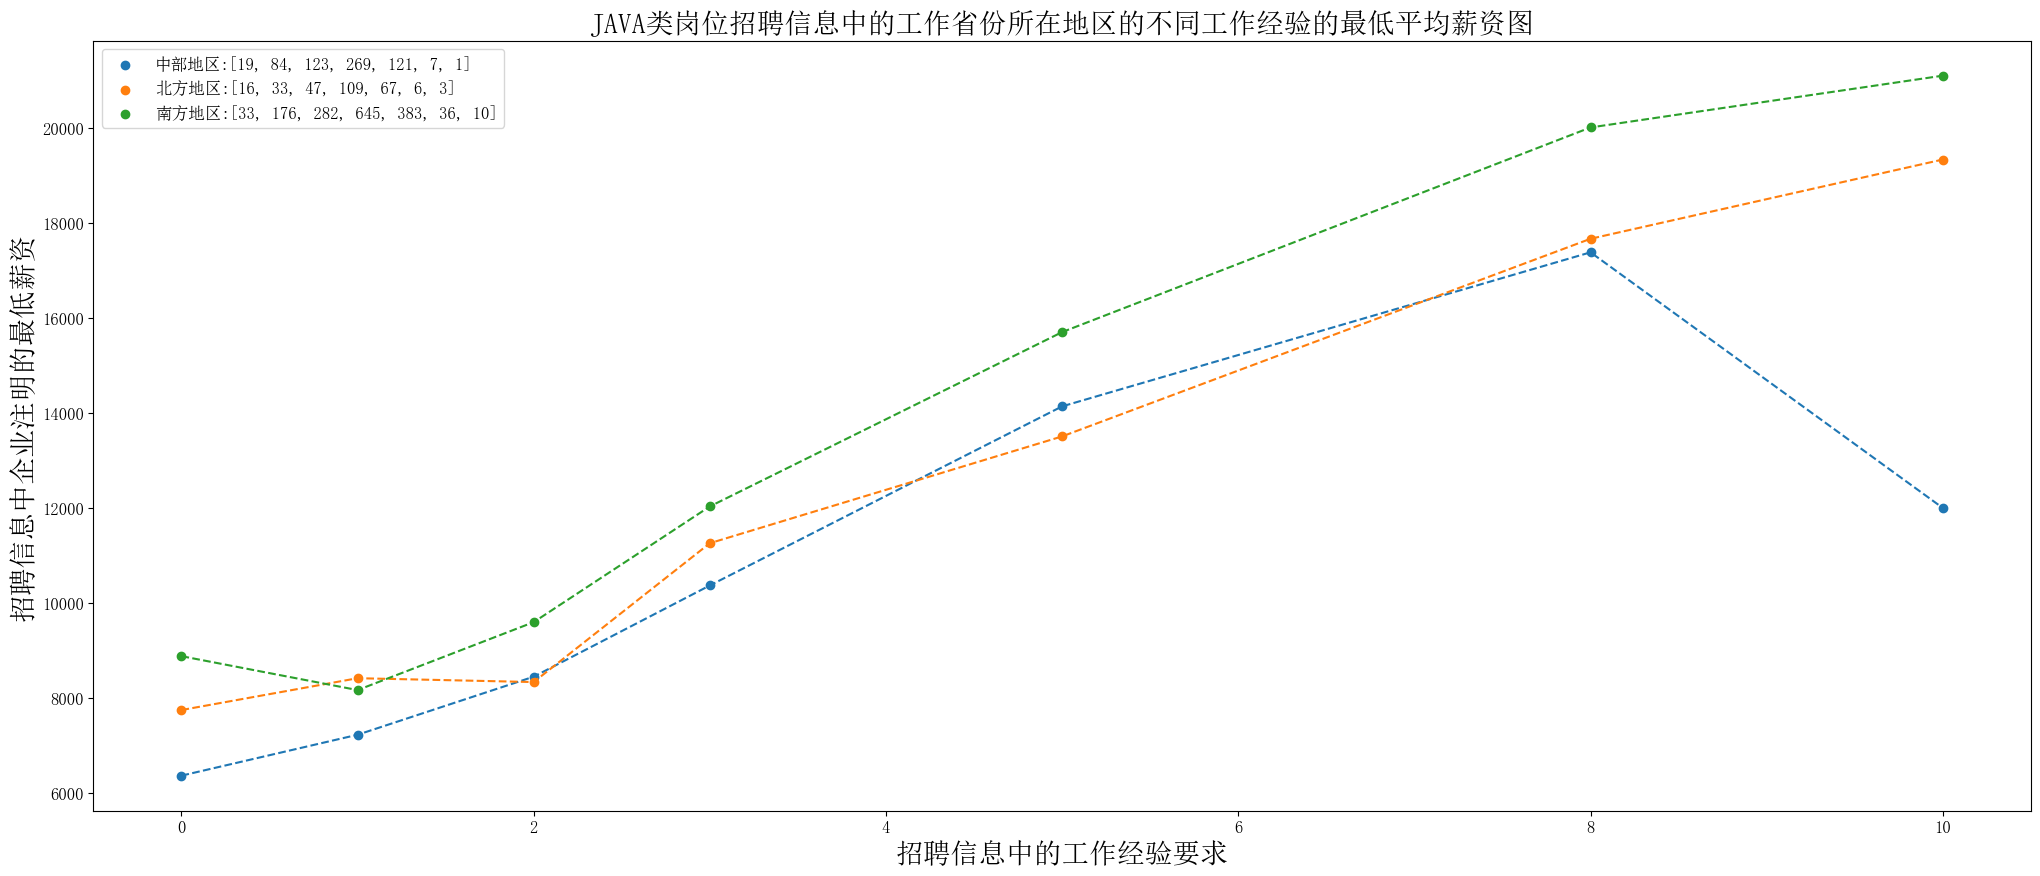

In [61]:
import matplotlib.pyplot as plt


# 按照学历要求分组
groups = this.groupby('省份所在地区')
# x轴数据列表
x_list = []
y_list = []
label_list = [[], []]
# y轴数据列表
'''生成坐标轴数据'''
for group_name,group in groups:
    years_groups = pd.DataFrame(group).groupby('工作经验要求')
    X = []
    Y = []
    label_num = []
    label_list[0].append(group_name) # group_name为图例
    for years_group_name,year_group in years_groups:
        # 保留每一个点数据的数据总数以供参考该点数据的价值
        label_num.append(len(year_group['最低薪资']))
        # 计算并设置变量存放本分组内的薪资平均值
        loc = 0
        for temp in range(len(year_group['最低薪资'])):
            year_group = year_group.reset_index(drop = True)
#             print(temp)
#             print(year_group)
            loc = int(((loc * temp) + year_group['最低薪资'][temp])/(temp+1))
        # 剔除其中数据占比不超过20条的分组
#         if len(year_group['最低薪资']) > 20:
        X.append(int(years_group_name))# X轴数据
        Y.append(loc)# Y轴数据
    x_list.append(X)
    y_list.append(Y)
    label_list[1].append(label_num)
# 设置字体
config = {
    "font.family": "serif",  # 使用衬线体
    "font.serif": ["SimSun"],  # 全局默认使用衬线宋体
    "font.size": 12,  # 五号，10.5磅
    "axes.unicode_minus": False,
    "mathtext.fontset": "stix",  # 设置 LaTeX 字体，stix 近似于 Times 字体
}
plt.rcParams.update(config)
# 设置画布颜色
# plt.gcf().set_facecolor('lightblue')
# Create a figure object
fig = plt.figure(figsize=(25,10))
# Add a subplot to the figure
ax = fig.add_subplot()
ax.patch.set_facecolor('white')
# 生成散点图并添加图例
for temp in range(len(x_list)):
    plt.scatter(x_list[temp], y_list[temp], label='{}:{}'.format(label_list[0][temp], label_list[1][temp]))
    plt.plot(x_list[temp], y_list[temp], '--')
plt.legend(facecolor='white')
# 添加折线


# 添加图表标题和坐标轴标签
plt.title('JAVA类岗位招聘信息中的工作省份所在地区的不同工作经验的最低平均薪资图', fontsize=20)
plt.xlabel('招聘信息中的工作经验要求', fontsize=20)
plt.ylabel('招聘信息中企业注明的最低薪资', fontsize=20)
plt.show()

# 工作省份所在地区与最高薪资关系

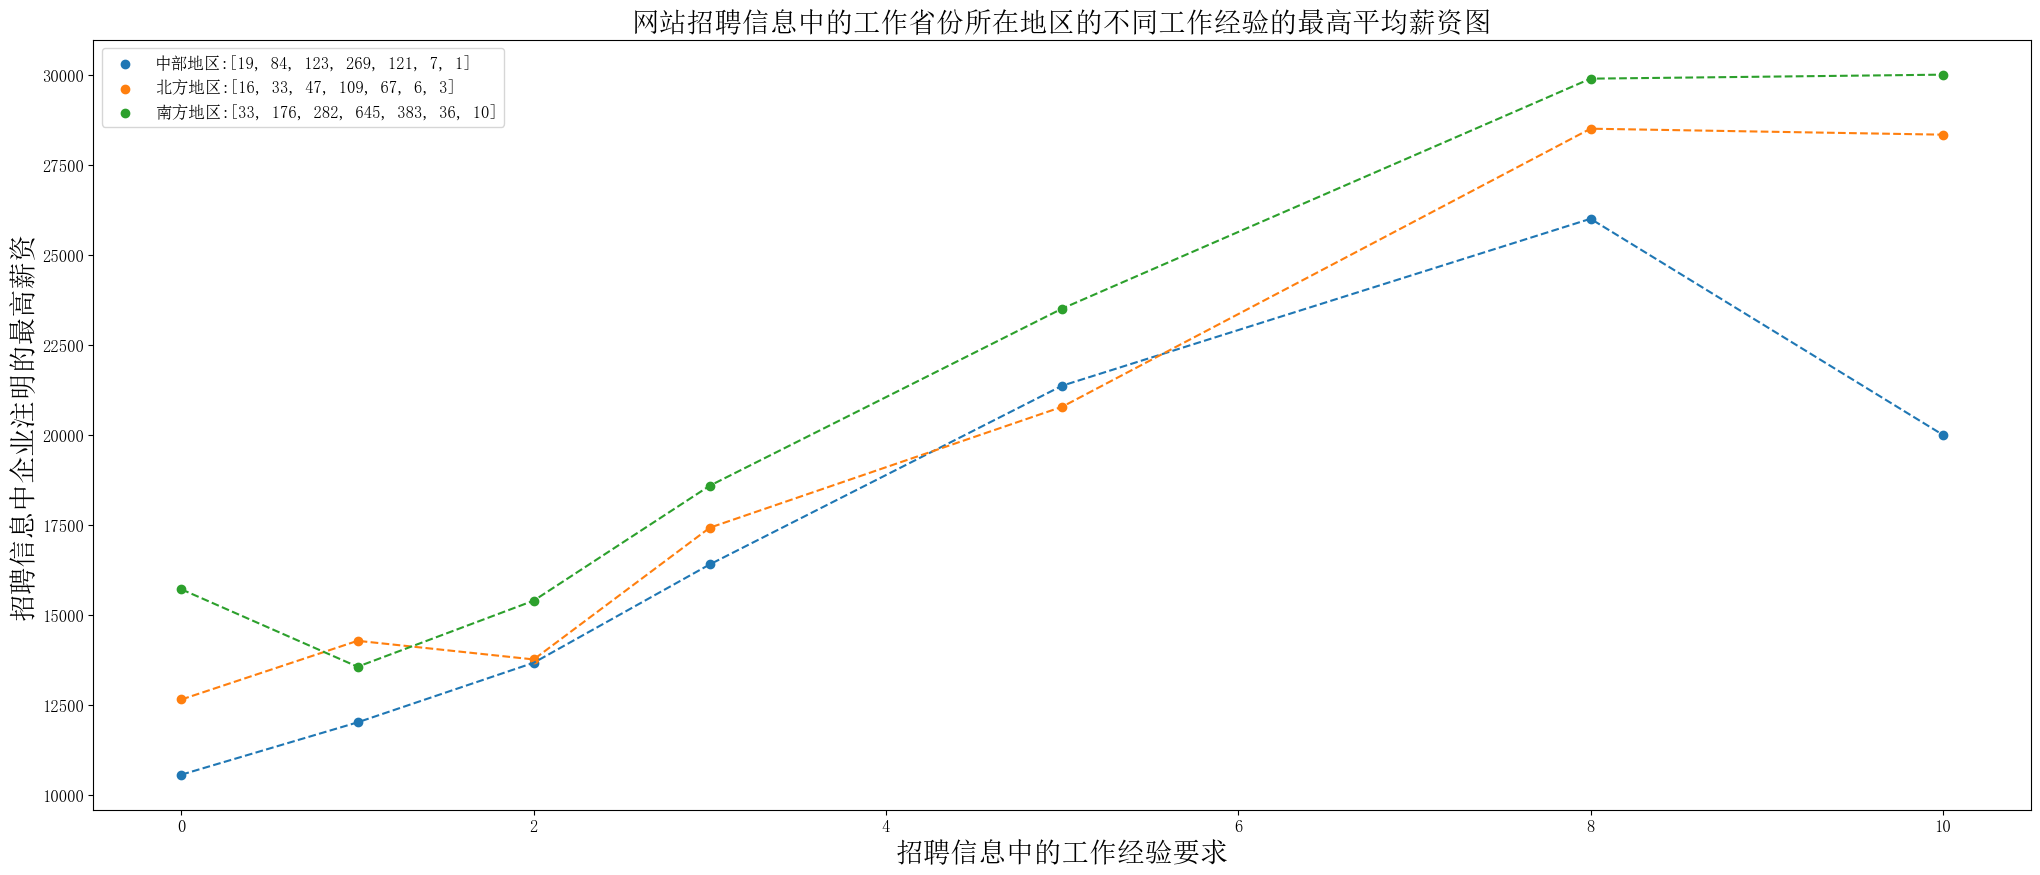

In [62]:
import matplotlib.pyplot as plt


# 按照学历要求分组
groups = this.groupby('省份所在地区')
# x轴数据列表
x_list = []
y_list = []
label_list = [[], []]
# y轴数据列表
'''生成坐标轴数据'''
for group_name,group in groups:
    years_groups = pd.DataFrame(group).groupby('工作经验要求')
    X = []
    Y = []
    label_num = []
    label_list[0].append(group_name) # group_name为图例
    for years_group_name,year_group in years_groups:
        # 保留每一个点数据的数据总数以供参考该点数据的价值
        label_num.append(len(year_group['最高薪资']))
        # 计算并设置变量存放本分组内的薪资平均值
        loc = 0
        for temp in range(len(year_group['最高薪资'])):
            year_group = year_group.reset_index(drop = True)
#             print(temp)
#             print(year_group)
            loc = int(((loc * temp) + year_group['最高薪资'][temp])/(temp+1))
        # 剔除其中数据占比不超过20条的分组
#         if len(year_group['最低薪资']) > 20:
        X.append(int(years_group_name))# X轴数据
        Y.append(loc)# Y轴数据
    x_list.append(X)
    y_list.append(Y)
    label_list[1].append(label_num)
# 设置字体
config = {
    "font.family": "serif",  # 使用衬线体
    "font.serif": ["SimSun"],  # 全局默认使用衬线宋体
    "font.size": 12,  # 五号，10.5磅
    "axes.unicode_minus": False,
    "mathtext.fontset": "stix",  # 设置 LaTeX 字体，stix 近似于 Times 字体
}
plt.rcParams.update(config)
# 设置画布颜色
# plt.gcf().set_facecolor('lightblue')
# Create a figure object
fig = plt.figure(figsize=(25,10))
# Add a subplot to the figure
ax = fig.add_subplot()
ax.patch.set_facecolor('white')
# 生成散点图并添加图例
for temp in range(len(x_list)):
    plt.scatter(x_list[temp], y_list[temp], label='{}:{}'.format(label_list[0][temp], label_list[1][temp]))
    plt.plot(x_list[temp], y_list[temp], '--')
plt.legend(facecolor='white')
# 添加折线


# 添加图表标题和坐标轴标签
plt.title('网站招聘信息中的工作省份所在地区的不同工作经验的最高平均薪资图', fontsize=20)
plt.xlabel('招聘信息中的工作经验要求', fontsize=20)
plt.ylabel('招聘信息中企业注明的最高薪资', fontsize=20)
plt.show()

In [63]:
person_data_list = [['广东省', 0], ['山东省', 0], ['河南省', 0], ['四川省', 0], ['江苏省', 0], ['河北省', 0], ['湖南省', 0], ['安徽省', 0], ['湖北省', 0], ['浙江省', 0], ['广西壮族自治区', 0], ['云南省', 0], ['江西省', 0], ['辽宁省', 0], ['黑龙江省', 0], ['陕西省', 0], ['山西省', 0], ['福建省', 0], ['贵州省', 0], ['重庆市', 0], ['吉林省', 0], ['甘肃省', 0], ['内蒙古自治区', 0], ['台湾省', 0], ['上海市', 0], ['新疆维吾尔自治区', 0], ['北京市', 0], ['天津市', 0], ['海南省', 0], ['香港特别行政区', 0], ['宁夏回族自治区', 0], ['青海省', 0], ['西藏自治区', 0], ['澳门特别行政区', 0]]

# 读入岗位数据
jobs_data = this

# 统计并计算所有省份职位信息的平均薪资
# 按照省份分组
groups = this.groupby('工作所在省份')

for group_name,group in groups:
    group = group.reset_index(drop = True)
    loc = -1
    for i in range(len(person_data_list)):
        if person_data_list[i][0] == group_name:
            loc = i
    # 存放最低最低薪资
    num = 0
    for temp in range(len(group['最低薪资'])):
        num = int(((num * temp) + group['最低薪资'][temp])/(temp+1))
    person_data_list[loc][1] = num
   
    
# # 根据出现次数计算每个省份的密度
# density = counts / counts.sum()

# # 将省份的名称和密度存储在一个新的 DataFrame 对象中
# density_df = pd.DataFrame({'NAME_1': density.index, 'density': density})

In [67]:
import json
from pyecharts.charts import Map
from pyecharts import options as opts
from pyecharts.render import make_snapshot

# 创建地图对象，并指定大小
map = Map(init_opts=opts.InitOpts(width='1600px', height='800px'))
#添加数据
map.add("各省份薪资分布", person_data_list, "china")
#设置全局配置，定制分段到1视觉映射
map.set_global_opts(
    title_opts=opts.TitleOpts("各个省份薪资(单位:元)", pos_left="center", pos_bottom="1%"),
    visualmap_opts=opts.VisualMapOpts(
        is_show=True, # 不显示条形图
        is_piecewise=True,#是否分段
        pieces=[
            {"min": 0, "max": 8000, "label": "0-8000", "color": "#CCFFFF"},
            {"min": 8000, "max": 10000, "label": "8000-10000", "color": "#FFFF99"},
            {"min": 10000, "max":12000 , "label": "10000-12000", "color": "#FF9966"},
            {"min": 12000, "max": 14000, "label": "12000-14000", "color": "#FF6666"},
            {"min": 14000, "max": 16000, "label": "14000-16000", "color": "#CC3333"},
            {"min": 16000, "max": 18000, "label": "16000-18000", "color": "#990033"},
            {"min": 18000, "label": "18000以上", "color": "#610B0B"}
        ]
    )
)
map.render("不同省份最低薪资图.html")

'C:\\Users\\Gimes\\Desktop\\毕业设计\\2.数据挖掘与分析\\不同省份最低薪资图.html'

# 工作省份所在地区与最低薪资关系

In [69]:
person_data_list = [['广东省', 0], ['山东省', 0], ['河南省', 0], ['四川省', 0], ['江苏省', 0], ['河北省', 0], ['湖南省', 0], ['安徽省', 0], ['湖北省', 0], ['浙江省', 0], ['广西壮族自治区', 0], ['云南省', 0], ['江西省', 0], ['辽宁省', 0], ['黑龙江省', 0], ['陕西省', 0], ['山西省', 0], ['福建省', 0], ['贵州省', 0], ['重庆市', 0], ['吉林省', 0], ['甘肃省', 0], ['内蒙古自治区', 0], ['台湾省', 0], ['上海市', 0], ['新疆维吾尔自治区', 0], ['北京市', 0], ['天津市', 0], ['海南省', 0], ['香港特别行政区', 0], ['宁夏回族自治区', 0], ['青海省', 0], ['西藏自治区', 0], ['澳门特别行政区', 0]]

# 读入岗位数据
jobs_data = this

# 统计并计算所有省份职位信息的平均薪资
# 按照省份分组
groups = this.groupby('工作所在省份')

for group_name,group in groups:
    group = group.reset_index(drop = True)
    loc = -1
    for i in range(len(person_data_list)):
        if person_data_list[i][0] == group_name:
            loc = i
    # 存放最低最低薪资
    num = 0
    for temp in range(len(group['最高薪资'])):
        num = int(((num * temp) + group['最高薪资'][temp])/(temp+1))
    person_data_list[loc][1] = num
   
    
# # 根据出现次数计算每个省份的密度
# density = counts / counts.sum()

# # 将省份的名称和密度存储在一个新的 DataFrame 对象中
# density_df = pd.DataFrame({'NAME_1': density.index, 'density': density})

In [71]:
import json
from pyecharts.charts import Map
from pyecharts import options as opts
from pyecharts.render import make_snapshot

# 创建地图对象，并指定大小
map = Map(init_opts=opts.InitOpts(width='1600px', height='800px'))
#添加数据
map.add("各省份薪资分布", person_data_list, "china")
#设置全局配置，定制分段到1视觉映射
map.set_global_opts(
    title_opts=opts.TitleOpts("各个省份薪资(单位:元)", pos_left="center", pos_bottom="1%"),
    visualmap_opts=opts.VisualMapOpts(
        is_show=True, # 不显示条形图
        is_piecewise=True,#是否分段
        pieces=[
            {"min": 0, "max": 8000, "label": "0-8000", "color": "#CCFFFF"},
            {"min": 8000, "max": 10000, "label": "8000-10000", "color": "#FFFF99"},
            {"min": 10000, "max":12000 , "label": "10000-12000", "color": "#FF9966"},
            {"min": 12000, "max": 14000, "label": "12000-14000", "color": "#FF6666"},
            {"min": 14000, "max": 16000, "label": "14000-16000", "color": "#CC3333"},
            {"min": 16000, "max": 18000, "label": "16000-18000", "color": "#990033"},
            {"min": 18000, "label": "18000以上", "color": "#610B0B"}
        ]
    )
)
map.render("不同省份最高薪资图.html")

'C:\\Users\\Gimes\\Desktop\\毕业设计\\2.数据挖掘与分析\\不同省份最高薪资图.html'

## 职位类别与薪资关系

### 职位类别与最低薪资关系

In [74]:
def get_job_type(search_job, df):
    # 将搜索到的Java（不区分大小写）传入待画图的数据中
    this = df[df['职位名称'].str.contains(search_job,case= False)]
    this = this.reset_index(drop = True)
#     print('数据总条数：{}'.format(len(this)))
    return this

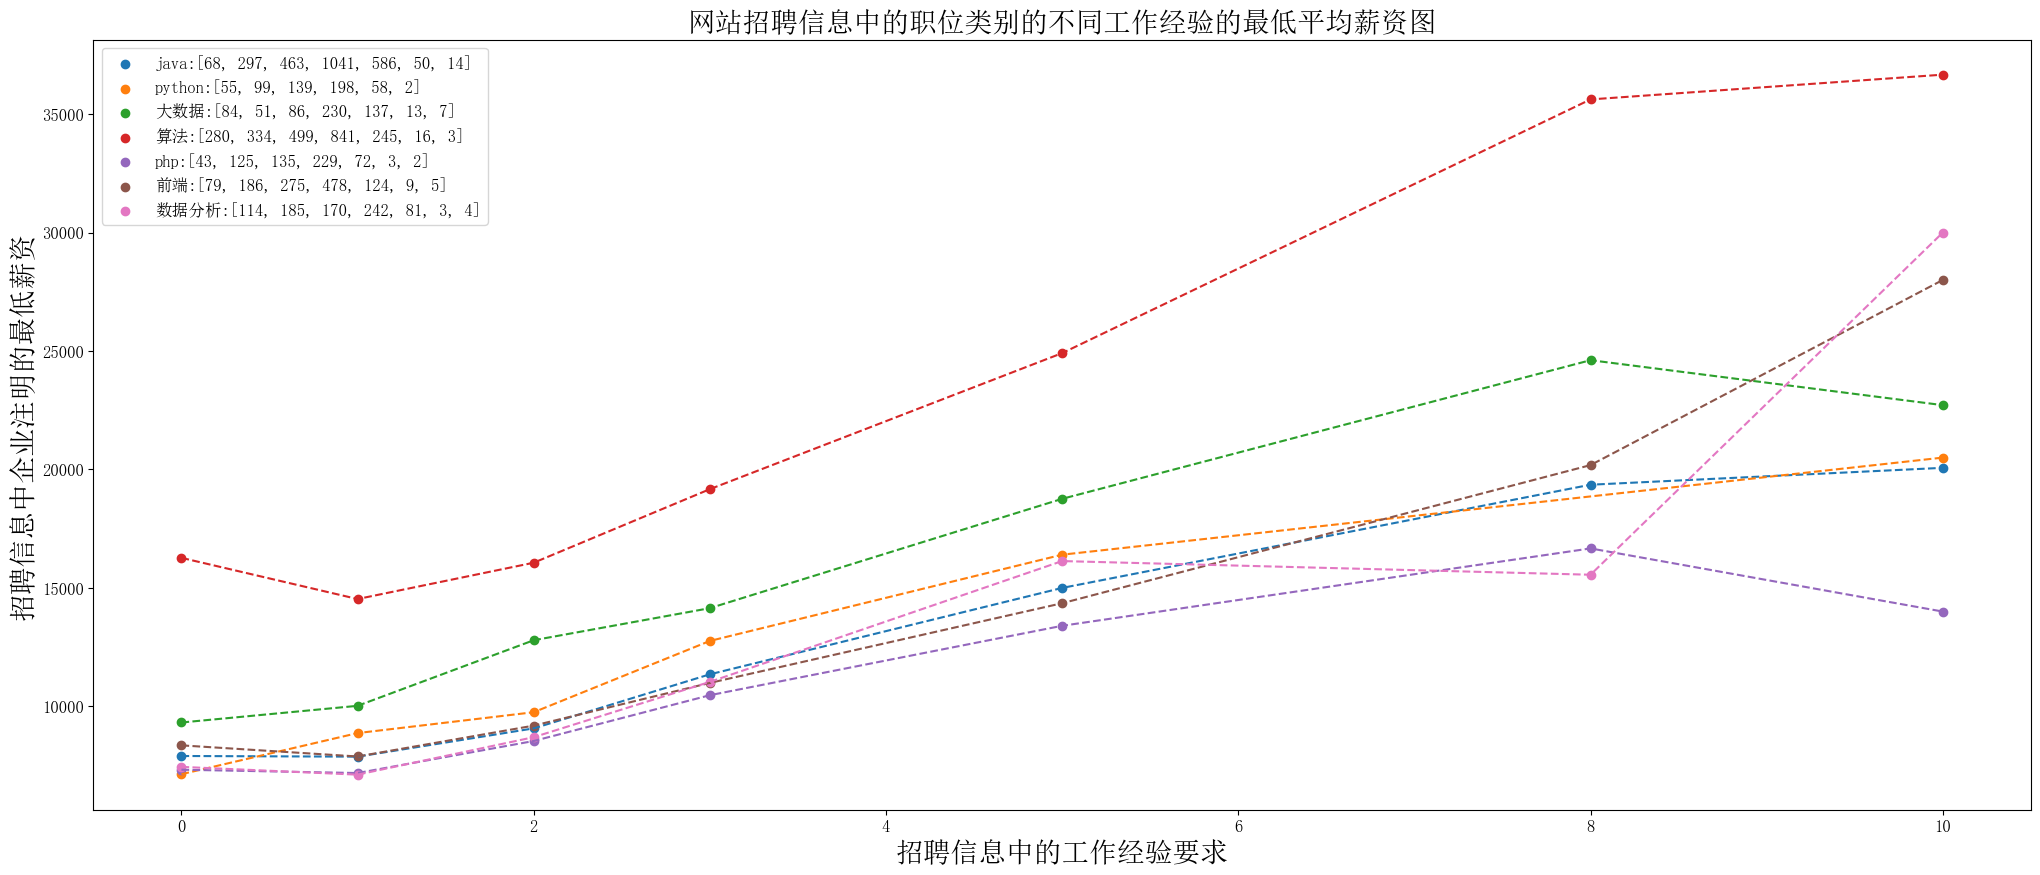

In [75]:
import matplotlib.pyplot as plt
# 设置待分析职位类型列表

x_list = []
y_list = []
label_list = [[], []]

word_list = ['java', 'python', '大数据', '算法', 'php', '前端', '数据分析']
# y轴数据列表
'''生成坐标轴数据'''
for j in range(len(word_list)):
    this = get_job_type(word_list[j], df)
    # 遍历一列数据后取出能够分割为两条数据以上的数据，其他不能参与分析数据不传入分析
    this = this[pd.DataFrame([len(re.findall('[\d|\.]+', temp)) >= 2 for temp in this['薪资待遇']])[0]]
    # print(type(df['薪资待遇']!='None'))
    # print(this)

    this = this.reset_index(drop = True)
    # 最低薪资
    # min = re.findall('[\d|\.]+', this['薪资待遇'][i])[0]
    # 最高薪资
    # max = re.findall('[\d|\.]+', this['薪资待遇'][i])[1]
    this = pd.concat([this, pd.DataFrame(columns=['最低薪资'])], sort=False)
    this = pd.concat([this, pd.DataFrame(columns=['最高薪资'])], sort=False)
    for i in range(len(this)):
        this.loc[i, '最低薪资'] = int(re.findall('[\d|\.]+', this['薪资待遇'][i])[0])
    for i in range(len(this)):
        this.loc[i, '最高薪资'] = int(re.findall('[\d|\.]+', this['薪资待遇'][i])[1])
    # 按照工作经验要求分组
    years_groups = this.groupby('工作经验要求')
    X = []
    Y = []
    label_num = []
    label_list[0].append(word_list[j]) # group_name为图例
    for years_group_name,year_group in years_groups:
        # 保留每一个点数据的数据总数以供参考该点数据的价值
        label_num.append(len(year_group['最低薪资']))
        # 计算并设置变量存放本分组内的薪资平均值
        loc = 0
        for temp in range(len(year_group['最低薪资'])):
            year_group = year_group.reset_index(drop = True)
#             print(temp)
#             print(year_group)
            loc = int(((loc * temp) + year_group['最低薪资'][temp])/(temp+1))
        # 剔除其中数据占比不超过20条的分组
#         if len(year_group['最低薪资']) > 20:
        X.append(int(years_group_name))# X轴数据
        Y.append(loc)# Y轴数据
    x_list.append(X)
    y_list.append(Y)
    label_list[1].append(label_num)
# 设置字体
config = {
    "font.family": "serif",  # 使用衬线体
    "font.serif": ["SimSun"],  # 全局默认使用衬线宋体
    "font.size": 12,  # 五号，10.5磅
    "axes.unicode_minus": False,
    "mathtext.fontset": "stix",  # 设置 LaTeX 字体，stix 近似于 Times 字体
}
plt.rcParams.update(config)
# 设置画布颜色
# plt.gcf().set_facecolor('lightblue')
# Create a figure object
fig = plt.figure(figsize=(25,10))
# Add a subplot to the figure
ax = fig.add_subplot()
ax.patch.set_facecolor('white')
# 生成散点图并添加图例
for temp in range(len(x_list)):
    plt.scatter(x_list[temp], y_list[temp], label='{}:{}'.format(label_list[0][temp], label_list[1][temp]))
    plt.plot(x_list[temp], y_list[temp], '--')
plt.legend(facecolor='white')
# 添加折线


# 添加图表标题和坐标轴标签
plt.title('网站招聘信息中的职位类别的不同工作经验的最低平均薪资图', fontsize=20)
plt.xlabel('招聘信息中的工作经验要求', fontsize=20)
plt.ylabel('招聘信息中企业注明的最低薪资', fontsize=20)
plt.show()

In [76]:
display(df)

,职位名称,职位详情,学历要求,工作经验要求,薪资待遇,工作城市,招聘公司,公司类型,公司行业,发布时间,数据所在模块,工作所在省份
0,高级软件工程师,"[c++, java, 主流数据库设计和开发, mes, wms, 低代码平台设计, jav...",本科,5,20833-25000,宁波,宁波伟立机器人科技股份有限公司,民营,"['仪器仪表/工业自动化', '机械/设备/重工']",02-18,高级软件工程师,浙江省
1,高级软件工程师,"[电子线路设计, 汇编语言, arm单片机]",本科,1,10000-18000,深圳-宝安区,新丰电器（深圳）有限公司,外资（非欧美）,['家具/家电/玩具/礼品'],02-18,高级软件工程师,广东省
2,Java高级开发工程师,"[java, springmvc, springboot, mybatis, restful...",本科,5,15000-20000·15薪,成都-天府新区,商飞软件有限公司,国企,"['航天/航空', '计算机软件']",02-18,高级软件工程师,四川省
3,运动控制算法工程师,"[差速驱动轮式, 汽车底盘轮式, 动力学建模, 控制系统建模, 算法仿真, 基础运动控制, ...",本科,3,15000-30000,深圳-龙华区,深圳博鹏智能科技有限公司,民营,"['电子技术/半导体/集成电路', '机械/设备/重工']",02-18,高级软件工程师,广东省
4,交换机软件专家,"[交换机, 交换机产品, 架构设计, 组网方案设计, 关键技术, 硬件适配, 芯片问题, 排...",本科,3,30000-60000,深圳-南山区,广州市吉灏电子有限公司,民营,"['计算机软件', '电子技术/半导体/集成电路']",02-18,高级软件工程师,广东省
...,...,...,...,...,...,...,...,...,...,...,...,...
27623,软件工程师,"[c++, 三维互动仿真, 数学等资历, 无加班, 带薪年假, 地铁16号线, 班车接送, ...",本科,2,8000-10000,上海-浦东新区,上海数林软件有限公司,民营,"['计算机软件', '教育/培训/院校']",03-11,软件工程师,上海市
27624,APP开发工程师（网络及流动应用程序),"[reactjs, reactnative, mysql, python, django, ...",本科,1,20000-30000,深圳-罗湖区,惠记环保工程（上海）有限公司,外资（非欧美）,['建筑/建材/工程'],03-11,软件工程师,广东省
27625,IT Engineer 软件工程师,[none],本科,1,6000-9000,苏州,太极半导体（苏州）有限公司,国企,['电子技术/半导体/集成电路'],03-20,软件工程师,江苏省
27626,接入网关研发工程师/资深专家-深圳 (职位编号：7211361769145731388),[none],本科,0,40000-80000,深圳,字节跳动,民营,"['互联网/电子商务', '计算机软件']",03-20,软件工程师,广东省


In [77]:
import re

this = df

# 遍历一列数据后取出能够分割为两条数据以上的数据，其他不能参与分析数据不传入分析
this = this[pd.DataFrame([len(re.findall('[\d|\.]+', temp)) >= 2 for temp in this['薪资待遇']])[0]]
# print(type(df['薪资待遇']!='None'))
# print(this)

this = this.reset_index(drop = True)
# 最低薪资
# min = re.findall('[\d|\.]+', this['薪资待遇'][i])[0]
# 最高薪资
# max = re.findall('[\d|\.]+', this['薪资待遇'][i])[1]
this = pd.concat([this, pd.DataFrame(columns=['最低薪资'])], sort=False)
this = pd.concat([this, pd.DataFrame(columns=['最高薪资'])], sort=False)
for i in range(len(this)):
    this.loc[i, '最低薪资'] = int(re.findall('[\d|\.]+', this['薪资待遇'][i])[0])
for i in range(len(this)):
    this.loc[i, '最高薪资'] = int(re.findall('[\d|\.]+', this['薪资待遇'][i])[1])

### 职位类别与最低薪资关系

In [78]:
display(df)

,职位名称,职位详情,学历要求,工作经验要求,薪资待遇,工作城市,招聘公司,公司类型,公司行业,发布时间,数据所在模块,工作所在省份
0,高级软件工程师,"[c++, java, 主流数据库设计和开发, mes, wms, 低代码平台设计, jav...",本科,5,20833-25000,宁波,宁波伟立机器人科技股份有限公司,民营,"['仪器仪表/工业自动化', '机械/设备/重工']",02-18,高级软件工程师,浙江省
1,高级软件工程师,"[电子线路设计, 汇编语言, arm单片机]",本科,1,10000-18000,深圳-宝安区,新丰电器（深圳）有限公司,外资（非欧美）,['家具/家电/玩具/礼品'],02-18,高级软件工程师,广东省
2,Java高级开发工程师,"[java, springmvc, springboot, mybatis, restful...",本科,5,15000-20000·15薪,成都-天府新区,商飞软件有限公司,国企,"['航天/航空', '计算机软件']",02-18,高级软件工程师,四川省
3,运动控制算法工程师,"[差速驱动轮式, 汽车底盘轮式, 动力学建模, 控制系统建模, 算法仿真, 基础运动控制, ...",本科,3,15000-30000,深圳-龙华区,深圳博鹏智能科技有限公司,民营,"['电子技术/半导体/集成电路', '机械/设备/重工']",02-18,高级软件工程师,广东省
4,交换机软件专家,"[交换机, 交换机产品, 架构设计, 组网方案设计, 关键技术, 硬件适配, 芯片问题, 排...",本科,3,30000-60000,深圳-南山区,广州市吉灏电子有限公司,民营,"['计算机软件', '电子技术/半导体/集成电路']",02-18,高级软件工程师,广东省
...,...,...,...,...,...,...,...,...,...,...,...,...
27623,软件工程师,"[c++, 三维互动仿真, 数学等资历, 无加班, 带薪年假, 地铁16号线, 班车接送, ...",本科,2,8000-10000,上海-浦东新区,上海数林软件有限公司,民营,"['计算机软件', '教育/培训/院校']",03-11,软件工程师,上海市
27624,APP开发工程师（网络及流动应用程序),"[reactjs, reactnative, mysql, python, django, ...",本科,1,20000-30000,深圳-罗湖区,惠记环保工程（上海）有限公司,外资（非欧美）,['建筑/建材/工程'],03-11,软件工程师,广东省
27625,IT Engineer 软件工程师,[none],本科,1,6000-9000,苏州,太极半导体（苏州）有限公司,国企,['电子技术/半导体/集成电路'],03-20,软件工程师,江苏省
27626,接入网关研发工程师/资深专家-深圳 (职位编号：7211361769145731388),[none],本科,0,40000-80000,深圳,字节跳动,民营,"['互联网/电子商务', '计算机软件']",03-20,软件工程师,广东省


In [79]:
def get_job_type(search_job, df):
    # 将搜索到的Java（不区分大小写）传入待画图的数据中
    this = df[df['职位名称'].str.contains(search_job,case= False)]
    this = this.reset_index(drop = True)
#     print('数据总条数：{}'.format(len(this)))
    return this

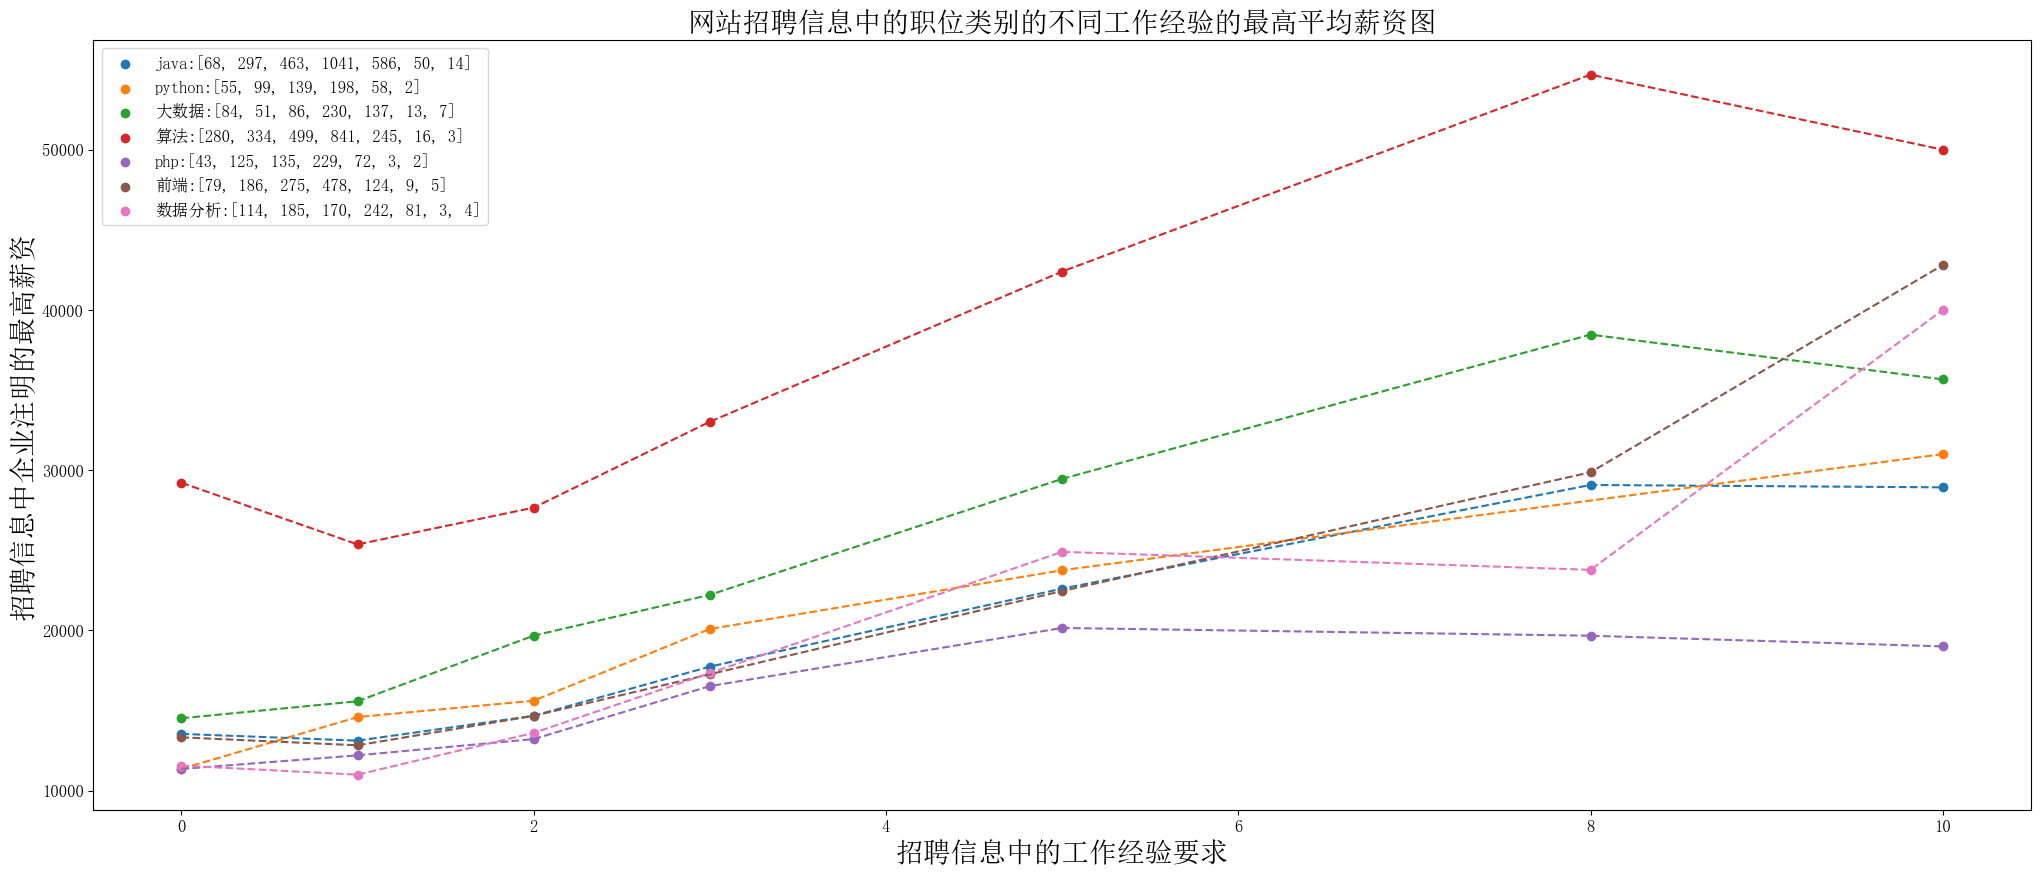

In [80]:
import matplotlib.pyplot as plt
# 设置待分析职位类型列表

x_list = []
y_list = []
label_list = [[], []]

word_list = ['java', 'python', '大数据', '算法', 'php', '前端', '数据分析']
# y轴数据列表
'''生成坐标轴数据'''
for j in range(len(word_list)):
    this = get_job_type(word_list[j], df)
    # 遍历一列数据后取出能够分割为两条数据以上的数据，其他不能参与分析数据不传入分析
    this = this[pd.DataFrame([len(re.findall('[\d|\.]+', temp)) >= 2 for temp in this['薪资待遇']])[0]]
    # print(type(df['薪资待遇']!='None'))
    # print(this)

    this = this.reset_index(drop = True)
    # 最低薪资
    # min = re.findall('[\d|\.]+', this['薪资待遇'][i])[0]
    # 最高薪资
    # max = re.findall('[\d|\.]+', this['薪资待遇'][i])[1]
    this = pd.concat([this, pd.DataFrame(columns=['最低薪资'])], sort=False)
    this = pd.concat([this, pd.DataFrame(columns=['最高薪资'])], sort=False)
    for i in range(len(this)):
        this.loc[i, '最低薪资'] = int(re.findall('[\d|\.]+', this['薪资待遇'][i])[0])
    for i in range(len(this)):
        this.loc[i, '最高薪资'] = int(re.findall('[\d|\.]+', this['薪资待遇'][i])[1])
    # 按照工作经验要求分组
    years_groups = this.groupby('工作经验要求')
    X = []
    Y = []
    label_num = []
    label_list[0].append(word_list[j]) # group_name为图例
    for years_group_name,year_group in years_groups:
        # 保留每一个点数据的数据总数以供参考该点数据的价值
        label_num.append(len(year_group['最高薪资']))
        # 计算并设置变量存放本分组内的薪资平均值
        loc = 0
        for temp in range(len(year_group['最高薪资'])):
            year_group = year_group.reset_index(drop = True)
#             print(temp)
#             print(year_group)
            loc = int(((loc * temp) + year_group['最高薪资'][temp])/(temp+1))
        # 剔除其中数据占比不超过20条的分组
#         if len(year_group['最低薪资']) > 20:
        X.append(int(years_group_name))# X轴数据
        Y.append(loc)# Y轴数据
    x_list.append(X)
    y_list.append(Y)
    label_list[1].append(label_num)
# 设置字体
config = {
    "font.family": "serif",  # 使用衬线体
    "font.serif": ["SimSun"],  # 全局默认使用衬线宋体
    "font.size": 12,  # 五号，10.5磅
    "axes.unicode_minus": False,
    "mathtext.fontset": "stix",  # 设置 LaTeX 字体，stix 近似于 Times 字体
}
plt.rcParams.update(config)
# 设置画布颜色
# plt.gcf().set_facecolor('lightblue')
# Create a figure object
fig = plt.figure(figsize=(25,10))
# Add a subplot to the figure
ax = fig.add_subplot()
ax.patch.set_facecolor('white')
# 生成散点图并添加图例
for temp in range(len(x_list)):
    plt.scatter(x_list[temp], y_list[temp], label='{}:{}'.format(label_list[0][temp], label_list[1][temp]))
    plt.plot(x_list[temp], y_list[temp], '--')
plt.legend(facecolor='white')
# 添加折线


# 添加图表标题和坐标轴标签
plt.title('网站招聘信息中的职位类别的不同工作经验的最高平均薪资图', fontsize=20)
plt.xlabel('招聘信息中的工作经验要求', fontsize=20)
plt.ylabel('招聘信息中企业注明的最高薪资', fontsize=20)
plt.show()

## 薪资与公司行业

In [82]:
search_job = 'java'
# 将搜索到的Java（不区分大小写）传入待画图的数据中
this = df[df['职位名称'].str.contains(search_job,case= False)]
this['职位详情'] = clean_self(this['职位详情'], search_job)
this = this.reset_index(drop = True)
print('数据总条数：{}'.format(len(this)))

数据总条数：2528


C:\Users\Gimes\AppData\Local\Temp\ipykernel_10032\1325713218.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  this['职位详情'] = clean_self(this['职位详情'], search_job)


In [83]:
import pandas as pd
# 将其中的字符串数据修改为列表
this['公司行业'] = [eval(this['公司行业'][i]) for i in range(len(this['公司行业']))]


In [84]:
# 将公司行业列表中的几列数据分别扩展成几行
def add_list(this):
    new_data = []
    for i in range(len(this)):
#         print(type(this['公司行业'][i]) is list)
        if (type(this['公司行业'][i]) is list):
            wait = this['公司行业'][i]
            for temp in range(len(wait)):
                if temp ==0:
                    this.loc[i, '公司行业'] = wait[temp]
                else:
                    new_row = this.iloc[i].copy()  # 拷贝原始数据行
        #             print(wait[temp])
                    new_row['公司行业'] = wait[temp]  # 替换公司行业列的值
                    new_data.append(new_row)
    # 将新行组成的列表转为DataFrame对象并合并到原表中
    new_df = pd.DataFrame(new_data, columns=this.columns)
    this = pd.concat([this, new_df], ignore_index=True)
    return this
    
this = add_list(this)


In [85]:
# 遍历一列数据后取出能够分割为两条数据以上的数据，其他不能参与分析数据不传入分析
this = this[pd.DataFrame([len(re.findall('[\d|\.]+', temp)) >= 2 for temp in this['薪资待遇']])[0]]
# print(type(df['薪资待遇']!='None'))
# print(this)

this = this.reset_index(drop = True)
# 最低薪资
# min = re.findall('[\d|\.]+', this['薪资待遇'][i])[0]
# 最高薪资
# max = re.findall('[\d|\.]+', this['薪资待遇'][i])[1]
this = pd.concat([this, pd.DataFrame(columns=['最低薪资'])], sort=False)
this = pd.concat([this, pd.DataFrame(columns=['最高薪资'])], sort=False)
for i in range(len(this)):
    this.loc[i, '最低薪资'] = int(re.findall('[\d|\.]+', this['薪资待遇'][i])[0])
for i in range(len(this)):
    this.loc[i, '最高薪资'] = int(re.findall('[\d|\.]+', this['薪资待遇'][i])[1])

###  最低薪资与公司行业

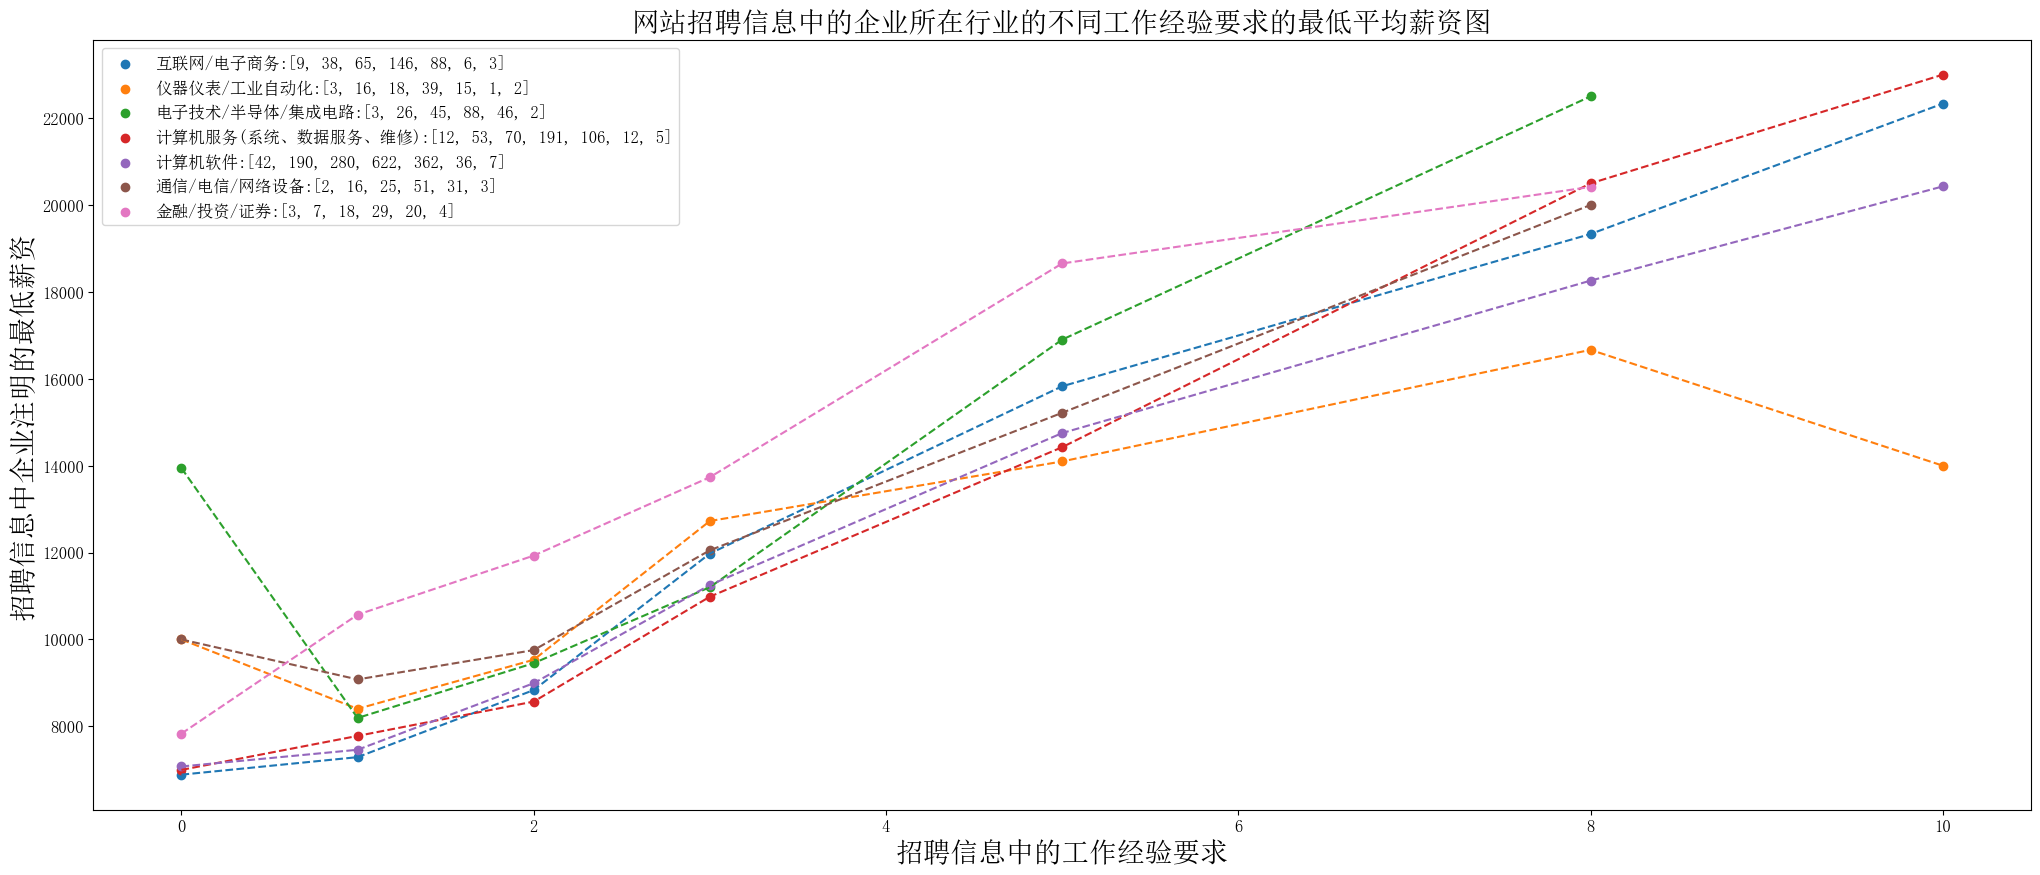

In [86]:
import matplotlib.pyplot as plt


# 按照学历要求分组
groups = this.groupby('公司行业')
# x轴数据列表
x_list = []
y_list = []
label_list = [[], []]
# y轴数据列表
'''生成坐标轴数据'''
for group_name,group in groups:
    # 若数据量少于1/100则不再生成分组
    if (group['职位名称'].count()) < len(this)/50:
        continue
    years_groups = pd.DataFrame(group).groupby('工作经验要求')
    X = []
    Y = []
    label_num = []
    label_list[0].append(group_name) # group_name为图例
    for years_group_name,year_group in years_groups:
        # 保留每一个点数据的数据总数以供参考该点数据的价值
        label_num.append(len(year_group['最低薪资']))
        # 计算并设置变量存放本分组内的薪资平均值
        loc = 0
        for temp in range(len(year_group['最低薪资'])):
            year_group = year_group.reset_index(drop = True)
#             print(temp)
#             print(year_group)
            loc = int(((loc * temp) + year_group['最低薪资'][temp])/(temp+1))
        # 剔除其中数据占比不超过20条的分组
#         if len(year_group['最低薪资']) > 20:
        X.append(int(years_group_name))# X轴数据
        Y.append(loc)# Y轴数据
    x_list.append(X)
    y_list.append(Y)
    label_list[1].append(label_num)
# 设置字体
config = {
    "font.family": "serif",  # 使用衬线体
    "font.serif": ["SimSun"],  # 全局默认使用衬线宋体
    "font.size": 12,  # 五号，10.5磅
    "axes.unicode_minus": False,
    "mathtext.fontset": "stix",  # 设置 LaTeX 字体，stix 近似于 Times 字体
}
plt.rcParams.update(config)
# 设置画布颜色
# plt.gcf().set_facecolor('lightblue')
# Create a figure object
fig = plt.figure(figsize=(25,10))
# Add a subplot to the figure
ax = fig.add_subplot()
ax.patch.set_facecolor('white')
# 生成散点图并添加图例
for temp in range(len(x_list)):
    plt.scatter(x_list[temp], y_list[temp], label='{}:{}'.format(label_list[0][temp], label_list[1][temp]))
    plt.plot(x_list[temp], y_list[temp], '--')
plt.legend(facecolor='white')
# 添加折线


# 添加图表标题和坐标轴标签
plt.title('网站招聘信息中的企业所在行业的不同工作经验要求的最低平均薪资图', fontsize=20)
plt.xlabel('招聘信息中的工作经验要求', fontsize=20)
plt.ylabel('招聘信息中企业注明的最低薪资', fontsize=20)
plt.show()

### 最高薪资与公司行业

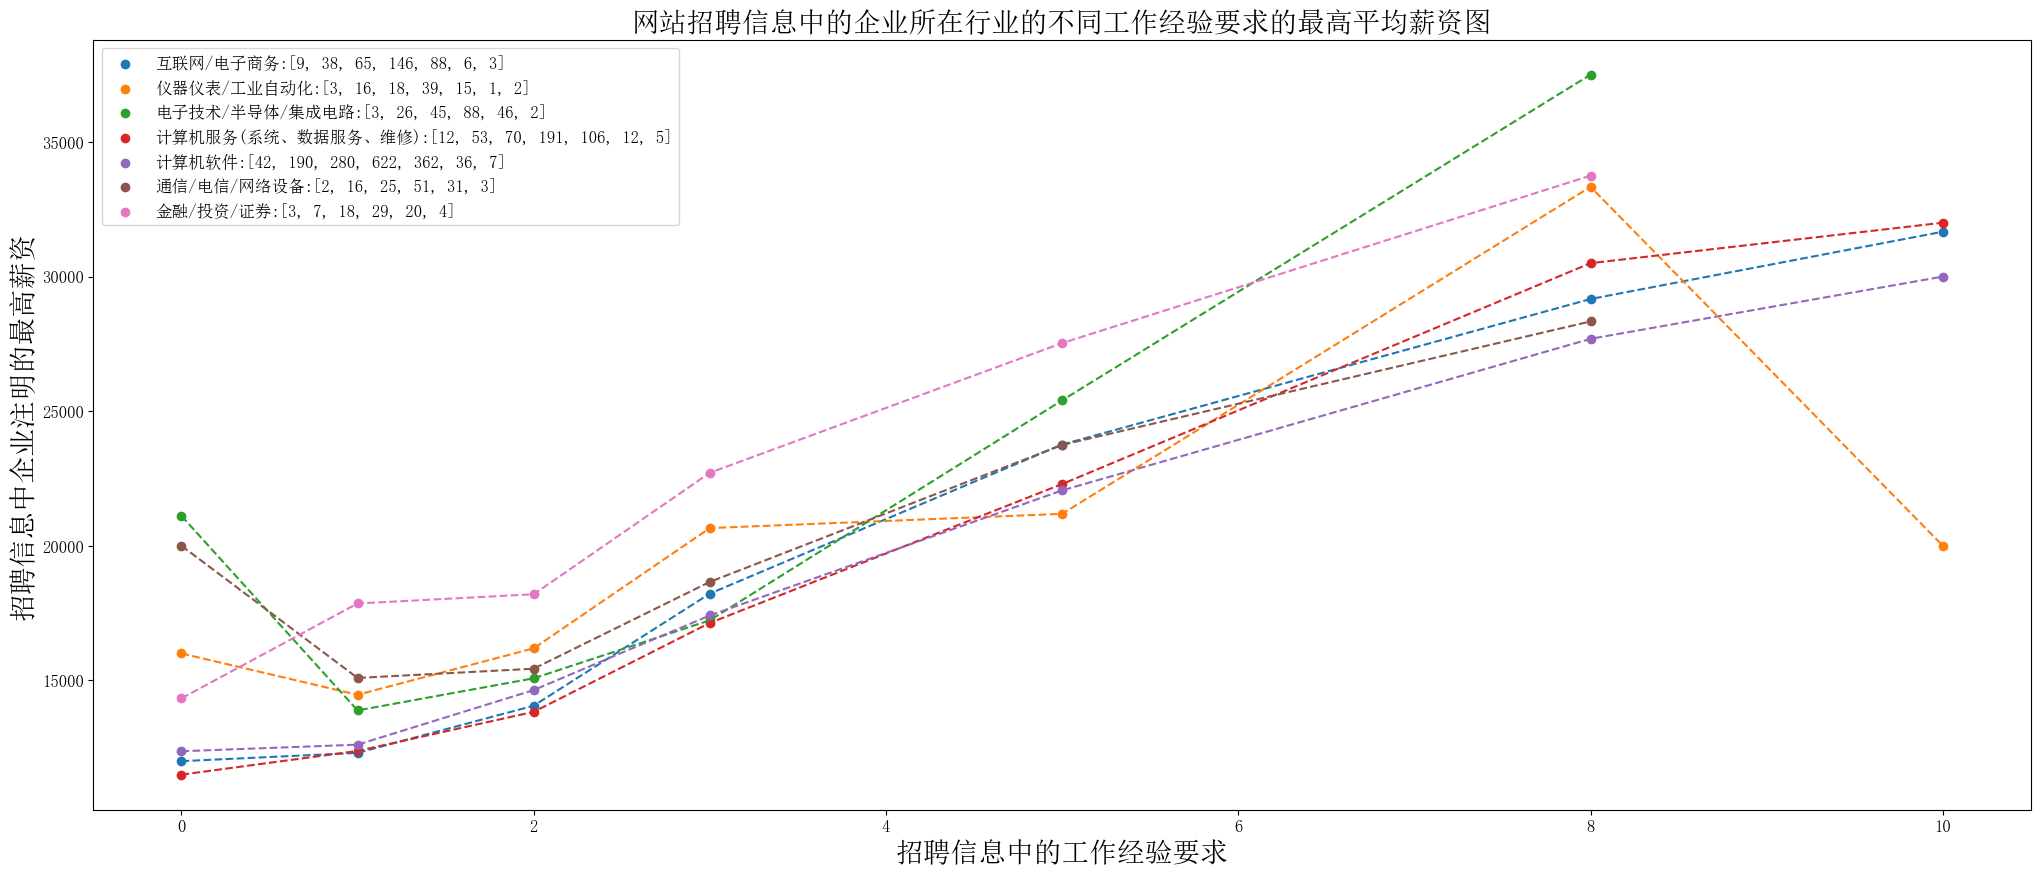

In [87]:
import matplotlib.pyplot as plt


# 按照学历要求分组
groups = this.groupby('公司行业')
# x轴数据列表
x_list = []
y_list = []
label_list = [[], []]
# y轴数据列表
'''生成坐标轴数据'''
for group_name,group in groups:
    # 若数据量少于1/100则不再生成分组
    if (group['职位名称'].count()) < len(this)/50:
        continue
    years_groups = pd.DataFrame(group).groupby('工作经验要求')
    X = []
    Y = []
    label_num = []
    label_list[0].append(group_name) # group_name为图例
    for years_group_name,year_group in years_groups:
        # 保留每一个点数据的数据总数以供参考该点数据的价值
        label_num.append(len(year_group['最高薪资']))
        # 计算并设置变量存放本分组内的薪资平均值
        loc = 0
        for temp in range(len(year_group['最高薪资'])):
            year_group = year_group.reset_index(drop = True)
#             print(temp)
#             print(year_group)
            loc = int(((loc * temp) + year_group['最高薪资'][temp])/(temp+1))
        # 剔除其中数据占比不超过20条的分组
#         if len(year_group['最低薪资']) > 20:
        X.append(int(years_group_name))# X轴数据
        Y.append(loc)# Y轴数据
    x_list.append(X)
    y_list.append(Y)
    label_list[1].append(label_num)
# 设置字体
config = {
    "font.family": "serif",  # 使用衬线体
    "font.serif": ["SimSun"],  # 全局默认使用衬线宋体
    "font.size": 12,  # 五号，10.5磅
    "axes.unicode_minus": False,
    "mathtext.fontset": "stix",  # 设置 LaTeX 字体，stix 近似于 Times 字体
}
plt.rcParams.update(config)
# 设置画布颜色
# plt.gcf().set_facecolor('lightblue')
# Create a figure object
fig = plt.figure(figsize=(25,10))
# Add a subplot to the figure
ax = fig.add_subplot()
ax.patch.set_facecolor('white')
# 生成散点图并添加图例
for temp in range(len(x_list)):
    plt.scatter(x_list[temp], y_list[temp], label='{}:{}'.format(label_list[0][temp], label_list[1][temp]))
    plt.plot(x_list[temp], y_list[temp], '--')
plt.legend(facecolor='white')
# 添加折线


# 添加图表标题和坐标轴标签
plt.title('网站招聘信息中的企业所在行业的不同工作经验要求的最高平均薪资图', fontsize=20)
plt.xlabel('招聘信息中的工作经验要求', fontsize=20)
plt.ylabel('招聘信息中企业注明的最高薪资', fontsize=20)
plt.show()